In [49]:
import pandas as pd
preprocessed_dataset_folder = "../Data/PreprocessedDataset"
ratings_df = pd.read_csv(preprocessed_dataset_folder+"/ratings.csv")
movies_df = pd.read_csv(preprocessed_dataset_folder+"/movies.csv")
display(ratings_df.head(10))

,user,item,rating,timestamp
0,17783,5954,5.0,1288572640
1,147353,2805,2.0,979368264
2,32778,1982,4.0,1559214270
3,17160,1225,4.5,1151466878
4,58005,6537,3.0,1112739432
5,133040,736,2.0,1076959711
6,73670,4975,2.0,1415292692
7,118041,1248,4.5,1522631138
8,73268,122904,0.5,1475355740
9,133495,1388,1.0,991281570


In [50]:
display(movies_df.head(5))

,item,title_original,genres,year,title,cast,director,origin,plot
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,toy story,"tim allen, tom hanks (voices)",john lasseter,american,In a world where toys are living things who pr...
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,jumanji,"robin williams, bonnie hunt, kirsten dunst, br...",joe johnston,american,"In 1869, near Brantford, New Hampshire, two br..."
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,grumpier old men,"jack lemmon, walter matthau, ann-margret, soph...",howard deutch,american,The feud between Max (Walter Matthau) and John...
3,5,Father of the Bride Part II (1995),Comedy,1995,father of the bride part ii,"steve martin, diane keaton, martin short, kimb...",charles shyer,american,The film begins five years after the events of...
4,6,Heat (1995),Action|Crime|Thriller,1995,heat,"al pacino, robert de niro, val kilmer, ashley ...",michael mann,american,"Neil McCauley, a career criminal, hires Waingr..."


# Movie dataframe preprocessing for content based/matrix factorisation

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np

# Preprocessing genre: one-hot encoding, each movie can belong to multiple genres, which are separated by '|'.
mlb = MultiLabelBinarizer()
genre_features = mlb.fit_transform(movies_df['genres'].str.split('|'))
genre_df = pd.DataFrame(genre_features, columns=mlb.classes_)

# Preprocessing cast: encoding categorical values (names of actors) as numerical labels.
le = LabelEncoder()
movies_df['cast'] = le.fit_transform(movies_df['cast'])

# Preprocessing plot:
def preprocess_plot_text(plot_text):
    # Tokenizing the plot text into individual words or phrases
    tokens = word_tokenize(plot_text)
    # Remove stop words and convert words to lowercase
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]
    return " ".join(filtered_tokens)

movies_df['cleaned_plot'] = movies_df['plot'].apply(preprocess_plot_text)
display(movies_df['cleaned_plot'])

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
plot_features = tfidf_vectorizer.fit_transform(movies_df['plot'])
plot_df = pd.DataFrame(plot_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# # Perform PCA for dimensionality reduction
# n_components = 200
# pca = PCA(n_components=n_components)
# plot_pca = pca.fit_transform(plot_features.toarray())
# plot_pca_df = pd.DataFrame(plot_pca, columns=[f'plotPCA_{i+1}' for i in range(n_components)])

movies_df = pd.concat([movies_df, plot_df], axis=1)
display(movies_df)

0      world toys living things pretend lifeless huma...
1      1869 near brantford new hampshire two brothers...
2      feud max walter matthau john jack lemmon coole...
3      film begins five years events first one george...
4      neil mccauley career criminal hires waingro he...
                             ...                        
973    1823 hugh glass guides andrew henry trappers u...
974    world populated anthropomorphic mammals judy h...
975    photographer chris washington reluctantly agre...
976    2029 mutants born 25 years logan healing abili...
977    2049 replicants described bioengineered humans...
Name: cleaned_plot, Length: 978, dtype: object

,item,title_original,genres,year,title,cast,director,origin,plot,cleaned_plot,...,époque,état,ōnishi,ʻohana,千恵子,安二郎,真宮,綿谷,賢治,魔怪
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,toy story,865,john lasseter,american,In a world where toys are living things who pr...,world toys living things pretend lifeless huma...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,jumanji,764,joe johnston,american,"In 1869, near Brantford, New Hampshire, two br...",1869 near brantford new hampshire two brothers...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,grumpier old men,353,howard deutch,american,The feud between Max (Walter Matthau) and John...,feud max walter matthau john jack lemmon coole...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,Father of the Bride Part II (1995),Comedy,1995,father of the bride part ii,838,charles shyer,american,The film begins five years after the events of...,film begins five years events first one george...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,Heat (1995),Action|Crime|Thriller,1995,heat,16,michael mann,american,"Neil McCauley, a career criminal, hires Waingr...",neil mccauley career criminal hires waingro he...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,139385,The Revenant (2015),Adventure|Drama,2015,the revenant,551,alejandro g. iñárritu,american,"In 1823, Hugh Glass guides Andrew Henry’s trap...",1823 hugh glass guides andrew henry trappers u...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
974,152081,Zootopia (2016),Action|Adventure|Animation|Children|Comedy,2016,zootopia,297,byron howard rich moore,american,In a world populated by anthropomorphic mammal...,world populated anthropomorphic mammals judy h...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
975,168250,Get Out (2017),Horror,2017,get out,474,jordan peele,american,African-American photographer Chris Washington...,photographer chris washington reluctantly agre...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
976,168252,Logan (2017),Action|Sci-Fi,2017,logan,375,james mangold,american,"In 2029, no mutants have been born in 25 years...",2029 mutants born 25 years logan healing abili...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
from wordcloud import WordCloud

# May be useful for visual explanations
# Visualises commonly occuring words in a set of movie plots
def visualize_wordcloud_for_movie_set(movie_indices, movie_df):
    combined_plot_text = ""

    for index in movie_indices:
        movie_col = movie_df['plot']
        movie_row = movie_col.iloc[index]
        cleaned_plot = preprocess_plot_text(str(movie_row))
        # cleaned_plot = movie_row.astype('string')
        print(str(cleaned_plot))
        combined_plot_text += cleaned_plot + " "

    # Create a word cloud for the combined plot text
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_plot_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud")
    plt.show()

movie_indices_to_visualize = [0, 1]
# visualize_wordcloud_for_movie_set(movie_indices_to_visualize, movies_df)

# Collaborative filtering (KNN)
Let's start by creating a regressor that will predict the user ratings on unseen movies and recommend the ones with the highest predicted ratings for the user

Numba is using threading layer omp - consider TBB
found 1 potential runtime problems - see https://boi.st/lkpy-perf


Precision:	0.677821324490001
Recall:	0.8685294875096575
Fscore:	0.7614155895467629
Precision:	0.6755371575004928
Recall:	0.8825650270409477
Fscore:	0.7652970075926753


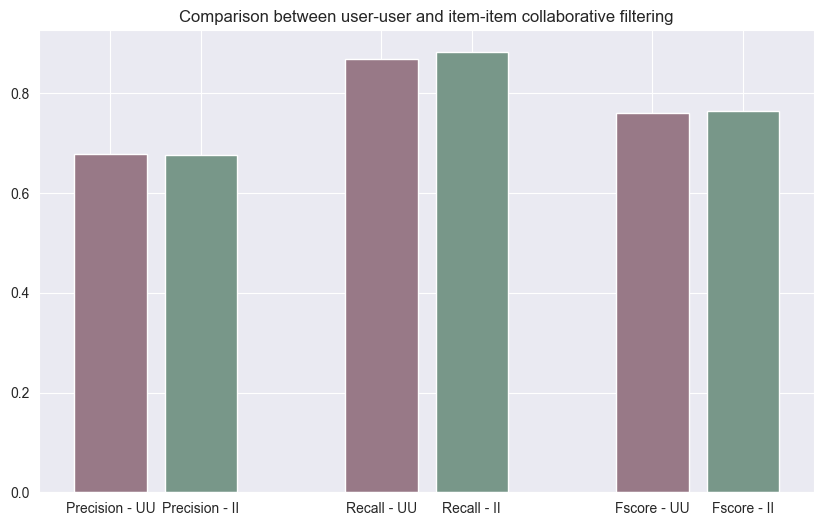

In [54]:
from lenskit.metrics.predict import rmse
from lenskit.algorithms import Recommender
from lenskit.algorithms.user_knn import UserUser # collaborative filtering
from lenskit.algorithms.item_knn import ItemItem # collaborative filtering
from lenskit.algorithms.mf_common import MFPredictor

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

# All metrics?
# rmse mae
# average precision, ndcg, rank score

train_dataframe, test_dataframe = train_test_split(ratings_df, test_size=0.2) # 80-20 train test split

user_user = UserUser(15, min_nbrs=3)
item_item = ItemItem(15, min_nbrs=3)

def evaluate_collaborative_filtering(model, train_df, test_df):
    recsys = Recommender.adapt(model)
    recsys.fit(train_df)
    test_df['predicted_rating'] = recsys.predict(test_df)
    test_df['relevant'] = test_df['rating'].apply(lambda x: 1 if x>3 else 0)
    test_df['predicted_relevant'] = test_df['predicted_rating'].apply(lambda x: 1 if x>3 else 0)
    y_test = list(test_df['relevant'])
    y_pred = list(test_df['predicted_relevant'])
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average="binary")

    print("Precision:\t" + str(precision) +
          "\nRecall:\t" + str(recall) +
          "\nFscore:\t" + str(fscore))
    return precision, recall, fscore

# Let's now plot and compare the two models - user and item based collaborative filtering
precision_user, recall_user, fscore_user = evaluate_collaborative_filtering(user_user, train_dataframe, test_dataframe)
precision_item, recall_item, fscore_item = evaluate_collaborative_filtering(item_item, train_dataframe, test_dataframe)

plt.figure(figsize=(10,6))
plt.bar(x = [0, 1 , 3, 4, 6, 7], height = [precision_user, precision_item, recall_user, recall_item, fscore_user, fscore_item], tick_label= ['Precision - UU', 'Precision - II', 'Recall - UU', 'Recall - II', 'Fscore - UU', 'Fscore - II'], color= ["#987987","#789789","#987987","#789789","#987987","#789789"])
plt.title('Comparison between user-user and item-item collaborative filtering')
plt.show()

Now let's check another evaluation method - cross validation with 5 folds:

In [56]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support
import statistics

def evaluate_collaborative_filtering_kfold(model, K):
    kf = KFold(n_splits=K, shuffle=True)

    precision_list = list()
    recall_list = list()
    fscore_list = list()

    for train_index, test_index in kf.split(ratings_df):
        train_df = ratings_df.iloc[train_index]
        test_df = ratings_df.iloc[test_index]
        recsys = Recommender.adapt(model)
        recsys.fit(train_df)

        test_df['predicted_rating'] = recsys.predict(test_df)
        test_df['relevant'] = test_df['rating'].apply(lambda x: 1 if x > 3 else 0)
        test_df['predicted_relevant'] = test_df['predicted_rating'].apply(lambda x: 1 if x > 3 else 0)

        y_test = list(test_df['relevant'])
        y_pred = list(test_df['predicted_relevant'])

        precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average="binary", zero_division=0)

        if precision > 0:
            precision_list.append(precision)
        if recall > 0:
            recall_list.append(recall)
        if fscore > 0:
            fscore_list.append(fscore)

    avg_precision = statistics.mean(precision_list)
    stdv_precision = statistics.stdev(precision_list)
    avg_recall = statistics.mean(recall_list)
    stdv_recall = statistics.stdev(recall_list)
    avg_fscore = statistics.mean(fscore_list)
    stdv_fscore = statistics.stdev(fscore_list)

    results = {
        'avg_precision': avg_precision,
        'stdv_precision': stdv_precision,
        'avg_recall': avg_recall,
        'stdv_recall': stdv_recall,
        'avg_fscore': avg_fscore,
        'stdv_fscore': stdv_fscore
    }

    display(results)

    return results

user_user_metrics = evaluate_collaborative_filtering_kfold(user_user, 5)
item_item_metrics = evaluate_collaborative_filtering_kfold(item_item, 5)

C:\Users\LiwiaPadowska\AppData\Local\Temp\ipykernel_14848\136451359.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['predicted_rating'] = recsys.predict(test_df)
C:\Users\LiwiaPadowska\AppData\Local\Temp\ipykernel_14848\136451359.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['relevant'] = test_df['rating'].apply(lambda x: 1 if x > 3 else 0)
C:\Users\LiwiaPadowska\AppData\Local\Temp\ipykernel_14848\136451359.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

{'avg_precision': 0.6800323617006373,
 'stdv_precision': 0.003383465000535969,
 'avg_recall': 0.8828718041288802,
 'stdv_recall': 0.003995054068892932,
 'avg_fscore': 0.7682794153756058,
 'stdv_fscore': 0.0019515318173450264}

C:\Users\LiwiaPadowska\AppData\Local\Temp\ipykernel_14848\3889237732.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['predicted_rating'] = recsys.predict(test_df)
C:\Users\LiwiaPadowska\AppData\Local\Temp\ipykernel_14848\3889237732.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['relevant'] = test_df['rating'].apply(lambda x: 1 if x > 3 else 0)
C:\Users\LiwiaPadowska\AppData\Local\Temp\ipykernel_14848\3889237732.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy 

{'avg_precision': 0.6833330263117419,
 'stdv_precision': 0.0034025922357264196,
 'avg_recall': 0.8733195124629811,
 'stdv_recall': 0.004380894092400273,
 'avg_fscore': 0.7667256812213586,
 'stdv_fscore': 0.0028594436577961463}

C:\Users\LiwiaPadowska\AppData\Local\Temp\ipykernel_14848\3889237732.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['predicted_rating'] = recsys.predict(test_df)
C:\Users\LiwiaPadowska\AppData\Local\Temp\ipykernel_14848\3889237732.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['relevant'] = test_df['rating'].apply(lambda x: 1 if x > 3 else 0)
C:\Users\LiwiaPadowska\AppData\Local\Temp\ipykernel_14848\3889237732.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy 

{'avg_precision': 0.6803901031682839,
 'stdv_precision': 0.005125730679983866,
 'avg_recall': 0.8847099221734762,
 'stdv_recall': 0.0030936676923337325,
 'avg_fscore': 0.7692036126421999,
 'stdv_fscore': 0.00358204268619671}